In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
cleandata = '../Data/train.csv'
data = pd.read_csv(cleandata, parse_dates=['date_a', 'date_p'])

In [3]:
chars = ['char_%d_a'%x for x in xrange(1, 11)]
chars.extend(['char_%d_p'%x for x in xrange(1, 11)])
chars.extend(['char_%d'%x for x in xrange(11, 39)])

In [4]:
chars_6 = []
chars_lg = []
for char in chars:
    cnt = len(data[char].unique())
    if cnt <= 6:
        chars_6.append(char)
    else:
        chars_lg.append(char)
print 'less than 6 types:\t%d\n'%len(chars_6), chars_6
print 'more than 6:types:\t%d\n'%len(chars_lg), chars_lg

less than 6 types:	31
['char_6_a', 'char_1_p', 'char_2_p', 'char_10_p', 'char_11', 'char_12', 'char_13', 'char_14', 'char_15', 'char_16', 'char_17', 'char_18', 'char_19', 'char_20', 'char_21', 'char_22', 'char_23', 'char_24', 'char_25', 'char_26', 'char_27', 'char_28', 'char_29', 'char_30', 'char_31', 'char_32', 'char_33', 'char_34', 'char_35', 'char_36', 'char_37']
more than 6:types:	17
['char_1_a', 'char_2_a', 'char_3_a', 'char_4_a', 'char_5_a', 'char_7_a', 'char_8_a', 'char_9_a', 'char_10_a', 'char_3_p', 'char_4_p', 'char_5_p', 'char_6_p', 'char_7_p', 'char_8_p', 'char_9_p', 'char_38']


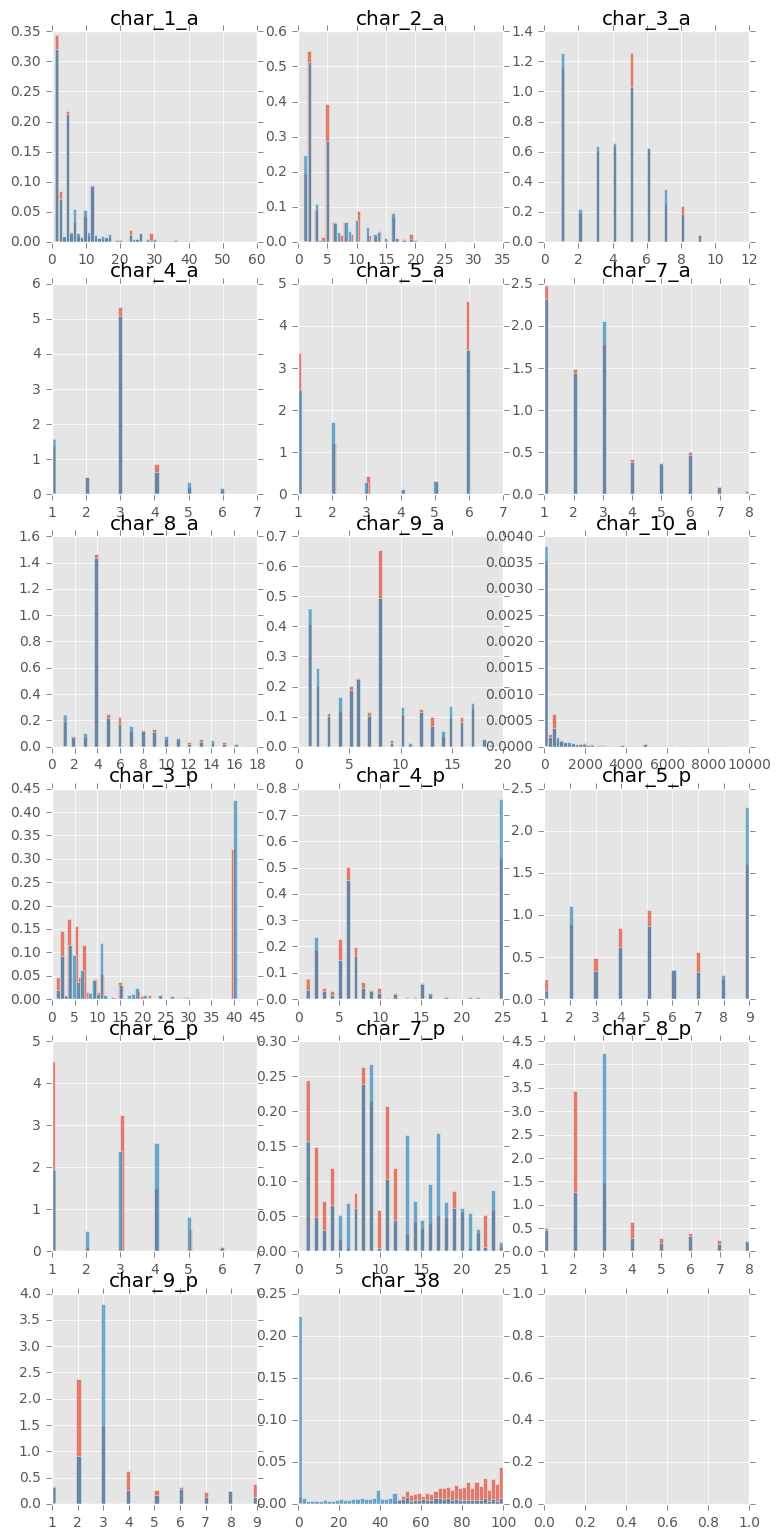

In [5]:

fig, axes = plt.subplots(6, 3)
fig.set_size_inches(9, 19)
for ax, char in zip(axes.flatten(), chars_lg):
    data[(data['outcome'] == 1)&(data[char] != -1)][char].hist(bins=50, normed=1, alpha=0.7, ax=ax)
#         df[(df['outcome'] == 1)&(df[char] != -1)][char].plot(kind='kde', ax=ax)
    data[(data['outcome'] == 0)&(data[char] != -1)][char].hist(bins=50, normed=1, alpha=0.7, ax=ax)
#         df[(df['outcome'] == 0)&(df[char] != -1)][char].plot(kind='kde', ax=ax)
    ax.set_title(char)
plt.show()

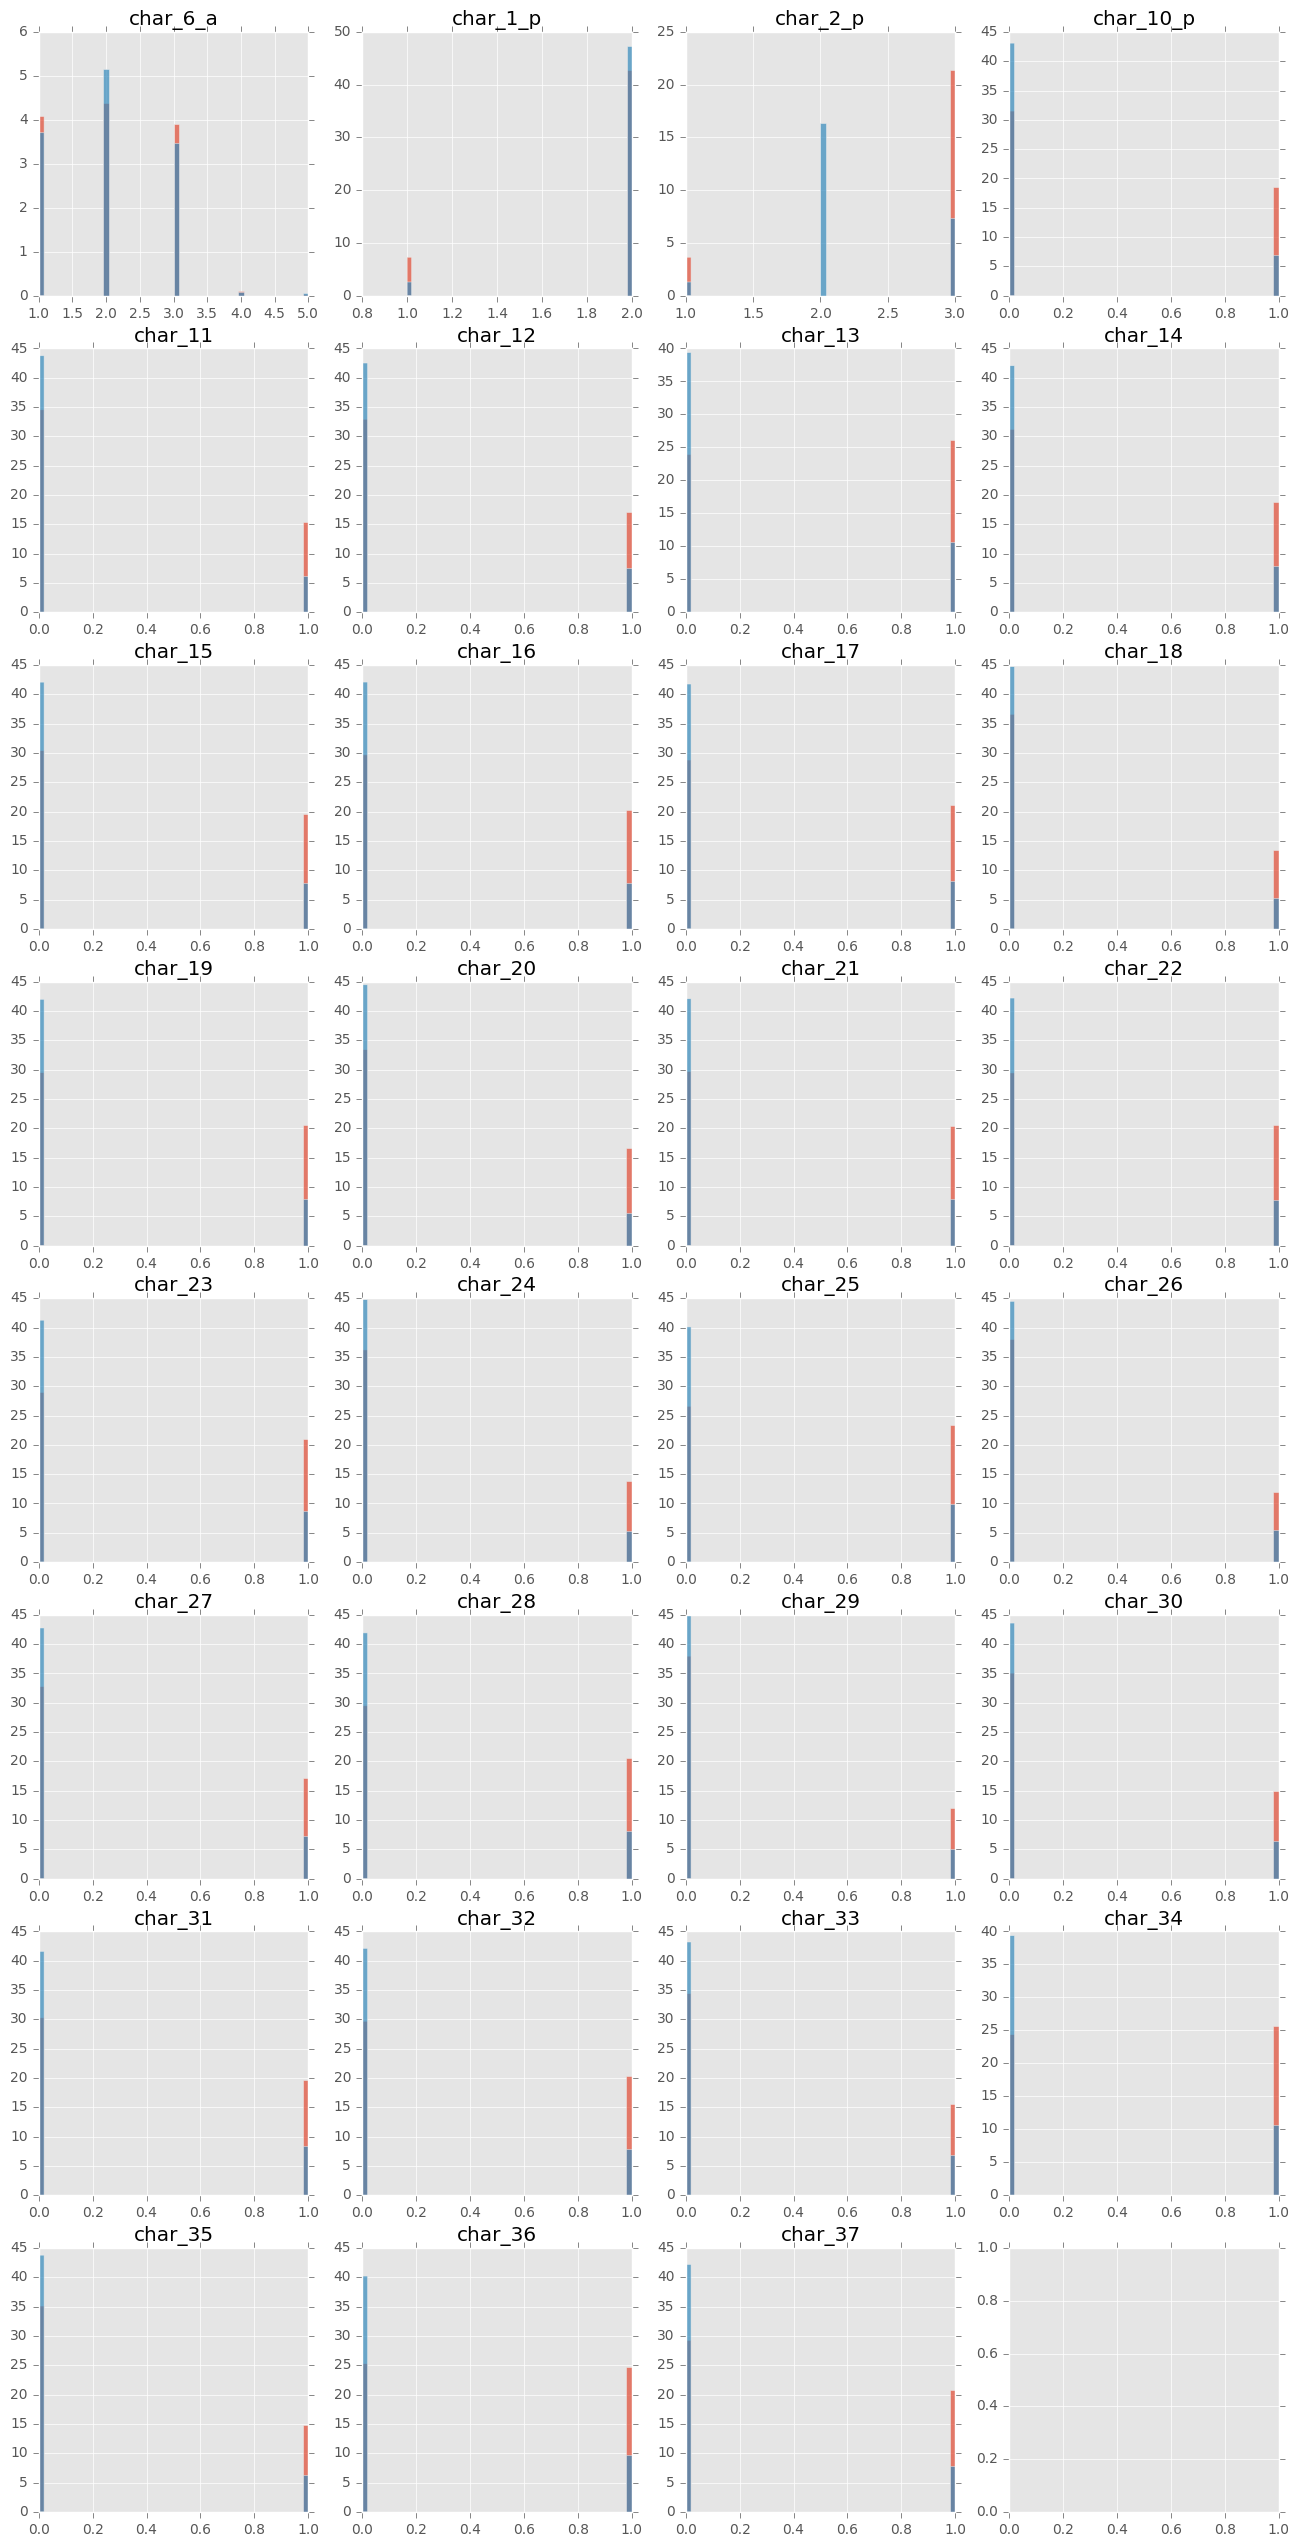

In [6]:
fig, axes = plt.subplots(8, 4)
fig.set_size_inches(16, 32)
for ax, char in zip(axes.flatten(), chars_6):
    data[(data['outcome'] == 1)&(data[char] != -1)][char].hist(bins=50, normed=1, alpha=0.7, ax=ax)
#         df[(df['outcome'] == 1)&(df[char] != -1)][char].plot(kind='kde', ax=ax)
    data[(data['outcome'] == 0)&(data[char] != -1)][char].hist(bins=50, normed=1, alpha=0.7, ax=ax)
#         df[(df['outcome'] == 0)&(df[char] != -1)][char].plot(kind='kde', ax=ax)
    ax.set_title(char)
plt.show()

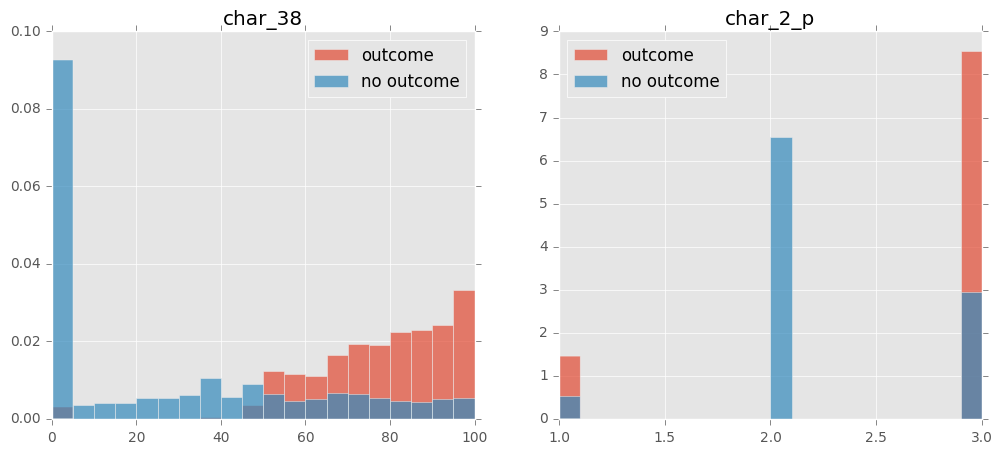

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
for char, ax in zip(['char_38', 'char_2_p'], axes.flatten()):
    data[(data['outcome'] == 1)&(data[char] != -1)][char].hist(bins=20, normed=1, alpha=0.7, label='outcome', ax=ax)
    data[(data['outcome'] == 0)&(data[char] != -1)][char].hist(bins=20, normed=1, alpha=0.7, label='no outcome', ax=ax)
    ax.set_title(char)
    ax.legend(loc='best')
plt.show()

In [8]:
data.drop(chars, axis=1).columns

Index([u'people_id', u'activity_id', u'date_a', u'activity_category',
       u'outcome', u'time_a', u'month_a', u'year_a', u'day_a', u'group_1',
       u'date_p', u'time_p', u'month_p', u'year_p', u'day_p', u'days_diff'],
      dtype='object')

In [22]:
df_gp_0 = data[data['outcome'] ==0].groupby(['group_1', 'date_a'])['activity_id'].count().reset_index()
data.groupby('time_a')['outcome'].sum()

time_a
0       379
1       221
2      1844
3      2544
4      2258
5      2275
6      1873
7       278
8       280
9      2063
10     2826
11     2121
12     2524
13     1720
14      237
15      273
16     1823
17     2370
18     2867
19     2751
20     1944
21      212
22      242
23     2194
24     3373
25     2340
26     1773
27     2218
28      243
29       85
       ... 
381    1496
382    3317
383    3906
384    1803
385     423
386     184
387    1638
388    2268
389    1690
390    1819
391    1459
392     248
393     187
394    1593
395    3261
396    3109
397    1756
398      15
399       0
400       2
401    2230
402    2228
403    1844
404    2781
405    2020
406     206
407     235
408    1537
409    2271
410     158
Name: outcome, dtype: int64

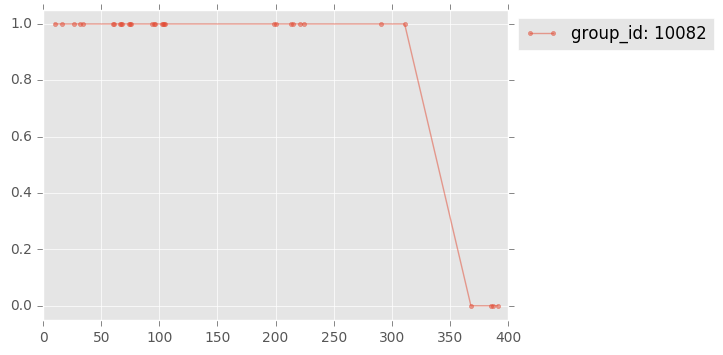

In [114]:
def get_ratio(df, time_label):
    df1 = df.groupby(time_label)['activity_id'].count().reset_index()
    df1 = df1.merge(df.groupby(time_label)['outcome'].sum().reset_index(), on=time_label)
    df1['ratio'] = df1['outcome']*1.0 / df1['activity_id']
    time = df1[time_label]
    ratio = df1['ratio']
    return time, ratio
    
def check_group(df, gpid):
    df_gp = df[df['group_1'] == gpid]
    time, ratio = get_ratio(df_gp, 'time_a')
    plt.plot(time, ratio, '.-', alpha= 0.5, label='group_id: %d'%gpid)
    plt.ylim(-0.05, 1.05)
    plt.legend(bbox_to_anchor=(1.46, 1), loc='upper right', ncol=1)
check_group(data, 10082)

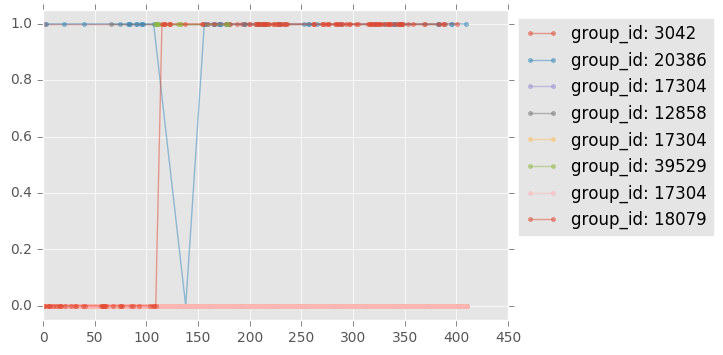

In [126]:
gps = data['group_1'].values
nums = np.random.choice(gps, 8)
for num in nums:
    check_group(data, num)